| [⬅️ Previous Exercise](Exercise2-2_Pandas.ipynb) | [🏠 Index](Index.ipynb) | [➡️ Next Exercise](Exercise3_SciPy.ipynb) |

# Seaborn 📈


![seaborn](./assets/seaborn.png)

This notebook provides a brief introduction to the [<span class="codeb">Seaborn</span>](https://seaborn.pydata.org) visualization library. 

<span class="code">Seaborn</span> helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.

Here's an example of seaborne's capabilities.

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

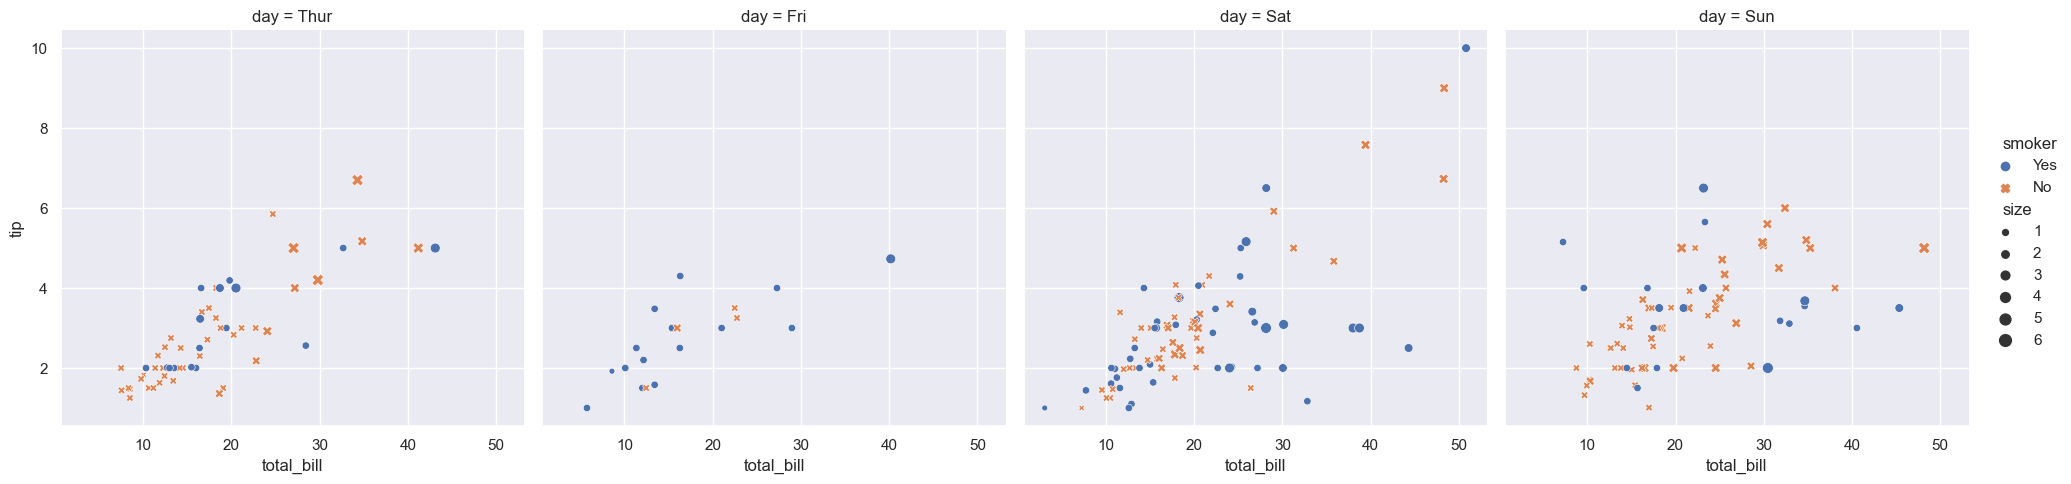

In [18]:

# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
# created a rel plot (ie. a relationship plot to see a categorical association by properties)
plot = sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="day",
    hue="smoker", style="smoker", size="size",)
tips.day.unique()



Behind the scenes, seaborn uses matplotlib to draw its plots. The plot above shows the relationship between five variables in the built-in `tips` dataset using a single call to the seaborn function `relplot()`. 

**Notice that you only need to provide the _names_ of the variables and their _roles_ in the plot.** 

This interface is different from `matplotlib`, in that you do not need to specify attributes of the plot elements in terms of the color values or marker codes. 

Behind the scenes, seaborn handled the translation from values in the dataframe to arguments that matplotlib understands. This **declarative approach** lets you stay focused on the questions that you want to answer, rather than on the details of how to control matplotlib.


### Seaborn `relplot()`

The function `relplot()` is named that way because it is designed to visualize many different statistical relationships. While scatter plots are often effective, relationships where one variable represents a measure of time are better represented by a line. The relplot() function has a convenient `kind` parameter that lets you easily switch to this alternate representation:

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


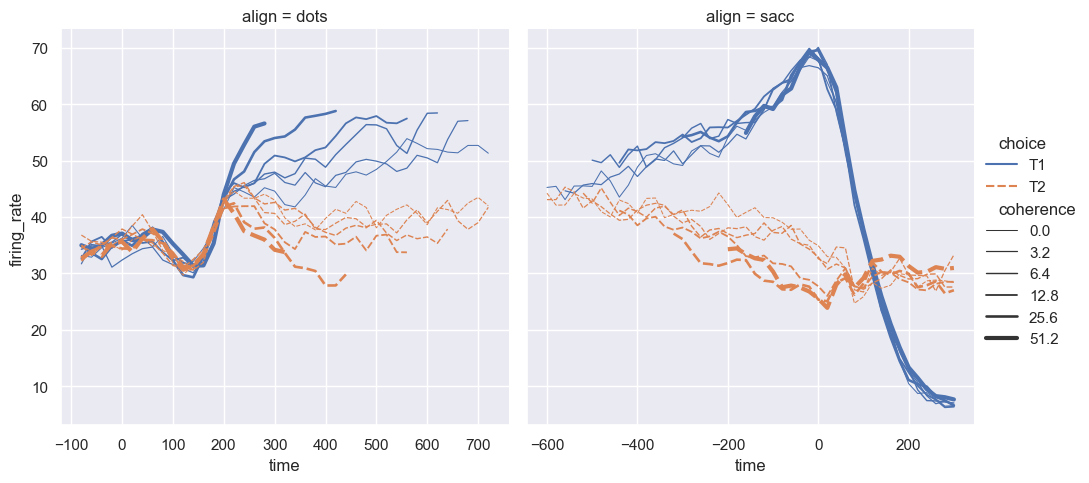

In [20]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

dots.head()


If you compare the two calls to `relplot()` in the two examples so far, you will see that the `size` and `style` parameters are used in both the scatter plots (first example) and line plots (second example). However, they affect the two visualizations differently.

In a scatter plot, the `size` and `style` arguments affect _marker area_ and _symbol_ representation.

In a line plot, the `size` and `style` arguments alter the _line width_ and _dashing_. 

Allowing the same arguments (syntax) to change meaning (semantics) across different contexts is more characteristic of natural languages than formal ones. In this case, `seaborn` is attempting to allow you to write in a ["grammar of graphics"](http://vita.had.co.nz/papers/layered-grammar.html), which is the same concept underlying ggplot created by Hadley Wickham. 

The benefit of adopting this less formal specification is that you do not need to worry about as many syntax details and instead can focus more on the overall structure of the plot and the information you want it to convey.

### Comparing `matplotlib` to `seaborn`

A focus of today's activities is translation, so let's look at translating some of the examples from yesterday's `matplotlib` exercise into seaborn.

First, as always, let's import our important packages:
<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [21]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Basic line plots (`sns.lineplot`)

Yesterday we used a few functions, $y_{\sin} = \sin{(x)}$ and $y_{\cos} = \cos{(x)}$:

```python
# Generate a 1D array with 300 points between -5 and 5
x = np.linspace(-5,5,300)
# Generate sine wave
ysin = np.sin(x)
# Generate cosine wave
ycos = np.cos(x)

# Now let's make a dataframe from these arrays:
df = pd.DataFrame({
    'x': x,
    'ysin': ysin,
    'ycos': ycos
    })


We can plot these on the same figure without instancing `plt.figure()` as follows:

```python
# Plot sine wave
plt.plot(x,ysin)
# Plot cosine wave
plt.plot(x,ycos)
```

Seaborn uses the `lineplot` command to plot line plots:
```python
sns.lineplot(data=df,x='x',y='ysin')
sns.lineplot(data=df,x='x',y='ycos')
```


Text(0.5, 1.0, 'This is my title')

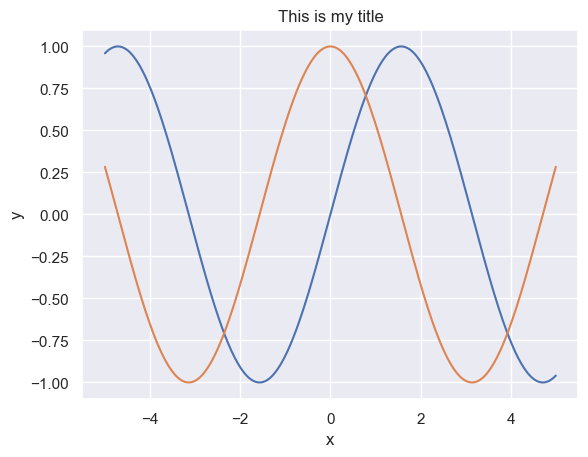

In [28]:
# Generate a 1D array with 300 points between -5 and 5
x = np.linspace(-5,5,300)
# Generate sine wave
ysin = np.sin(x)
# Generate cosine wave
ycos = np.cos(x)

# Now let's make a dataframe from these arrays:
df = pd.DataFrame({
    'x': x,
    'ysin': ysin,
    'ycos': ycos
    })

sns.lineplot(data=df,x='x',y='ysin')
sns.lineplot(data=df,x='x',y='ycos')

plt.ylabel('y')
#can move outside of the plot and manipulating individual elements or other customizations via matplotlib 
# getting the easy factors of 

#%matplotlib inline
# this makes it so that it will call the plot 

plt.title('This is my title')

#plt.savefig('mygraph.png')
# use save fig to save a figure where you want it to be


<div class="practice">
    📚  <b> Practice 2. </b> 
    1. Load the <code>flights</code> dataset using the <code>sns.load_dataset("flights")</code> command.  2. Explore the dataframe (it contains passenger data by month and year). 3. Use `sns.lineplot()` to plot the number of passengers throughout the data set. 4. Create a new dataset that contains data on a specific month (your choice) to see how monthly passengers have changed over time. 5. Create a plot that shows the average and range of passengers by year. (Hint: This is much easier than it sounds in seaborn!)
</div>

Text(0.5, 1.0, 'Number of Passengers')

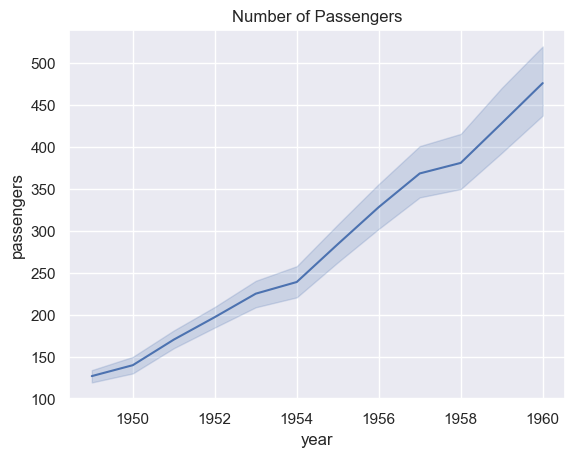

In [109]:
flights = sns.load_dataset("flights")

flights.head()
#flights.tail()

sns.lineplot(data=flights, y = flights.passengers, x = flights.year)
plt.title("Number of Passengers")


Text(0.5, 1.0, 'Number of Passengers in January')

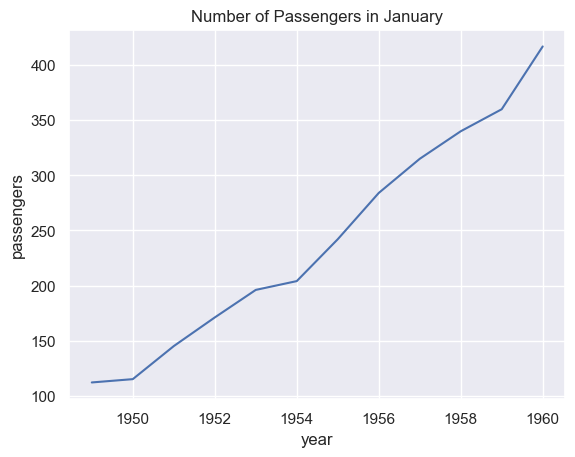

In [64]:
flights_jan = flights.loc[flights["month"] == "Jan"]

sns.lineplot(data=flights_jan, y = flights_jan.passengers, x = flights_jan.year)
plt.title("Number of Passengers in January")



Text(0.5, 1.0, 'Number of Passengers')

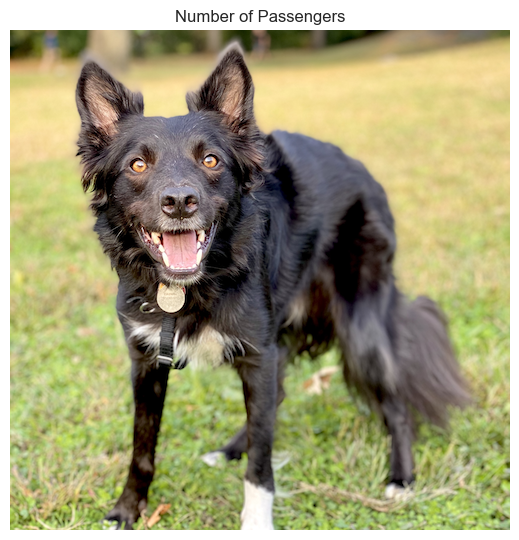

In [71]:
sns.dogplot(data=flights, y = flights.passengers, x = flights.year)
plt.title("Number of Passengers")

<AxesSubplot:xlabel='month', ylabel='passengers'>

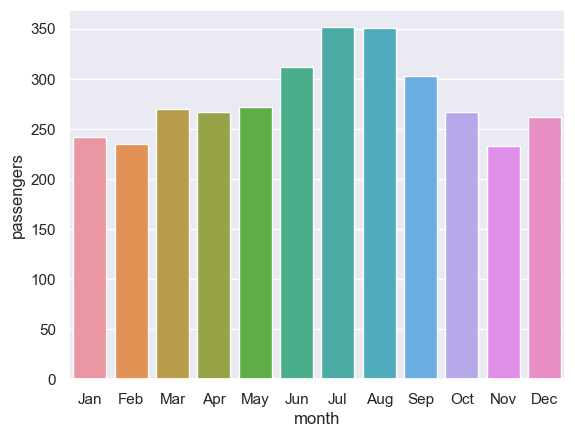

In [128]:
#flights_jan['passenger_mean'] = (flights_jan.passengers.mean())

#flights.head()


av_month = flights.groupby(['month']).mean()
#flights.head()

av_month.head()

sns.barplot(data = av_month, x = av_month.index, y = av_month.passengers)


In [72]:
fmri = sns.load_dataset("fmri")






### Working with real data
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

As we learned in the previous exercise, working with real-world data usually complicates things, and plotting is no exception. In particular, working with time series can get a bit messy. Let's take a look at our BSRN data as an example.

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [ ]:
# Import data
bsrn = pd.read_csv('../data/BSRN_GOB_2019-10.csv',index_col=0,parse_dates=True)

Now that we've imported our data, let's make a quick plot of incoming shortwave radiation over time.

<div class="run">
    ▶️ <b> Translate the cell below into seaborn. </b>
</div>

In [ ]:
# # Initialize empty figure
# fig = plt.figure()
# # Plot incoming SW radiation
# plt.plot(bsrn.index,bsrn.SWD_Wm2)
# # Label y-axis
# plt.ylabel(r'Incoming SW radiation (W m$^{-2}$)')




The x-axis looks rather messy because the tick labels are *timestamps*, which are, by nature, very long. Luckily, <span class="code">matplotlib</span> has a module called <span class="code">dates</span> for dealing with `datetime` objects. 

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [ ]:
import matplotlib.dates as mdates

Without going into too much detail, we can use some of the more advanced `Axes` settings to format and rotate the tick labels such that they no longer overlap, and we can use <span class="code">matplotlib.dates</span> to format the timestamps. In short, we will use the `mdates.DateFormatter()` function to format the timestamps according to [C formatting codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior). 

The following example demonstrates this, and includes a good code chunk for formatting timestamps to add to your repertoire. It is important to note that the formatting methods employed here are `Axes` methods, which means that we must operate on an `Axes` object, rather than the `Figure`.

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [ ]:
# Initialize empty figure and axes
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# Plot incoming SW radiation
ax.plot(bsrn.index,bsrn.SWD_Wm2)
# Label y-axis
ax.set_ylabel(r'Incoming SW radiation (W m$^{-2}$)')

# Format timestamps
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
# Format and rotate ticks
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=10, ha='right')
ax.get_xticklabels()

<div class="practice">
    📚  <b> Practice 3. </b> 
    Plot temperature and relative humidity (ideally using subplots) over the month of October 2019 at the BSRN station. Be sure to format the timestamps and include axis labels, a title, and a legend, if necessary.
</div>

<hr style="border-top: 1px solid gray; margin-top: 24px; margin-bottom: 1px"></hr>

In [ ]:
# IGNORE THIS CELL
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/exercises.css", "r").read()
    return HTML(styles)
css_styling()